In [1]:
"""username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")"""

"username = \"nova\"\npathtorepo = \"/home/nova/work/repo_ds/dynamical-systems\"\nusing Pkg\nPkg.activate(pathtorepo * \"/env/integrate/\")\n\nusing StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding \nusing CairoMakie, GLMakie\n\ninclude(\"/home/nova/work/repo_ds/dynamical-systems/system.jl\")\ninclude(\"/home/nova/work/repo_ds/dynamical-systems/visual.jl\")"

In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [3]:
time = 3000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [4]:
u0 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [5]:
"""for elem in dict
    println(elem);
end;"""
;

In [6]:
param[11] =  -1.741;
param[6] = 1.0;

In [7]:
ds= CoupledODEs(TM6_glial_ECM, [0.7035258970042696, 0.9506272282640841, 0.47130936959240044, 0.31591026128759353, 0.00037309184770071847, 3.9777099335989316e-11], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);
#plot_timesereis(trange, tr[:, 1], 1, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

(6-dimensional StateSpaceSet{Float64} with 3000001 points, 0.0:0.001:3000.0)

In [8]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);

In [9]:
fp

6-dimensional StateSpaceSet{Float64} with 3 points
 2.98076   0.780101  0.630456  0.0656946    3.24033e-65  -1.83624e-123
 8.87461   0.48152   0.808868  0.000182715  3.75859e-48   1.78122e-149
 0.944945  0.924509  0.576087  0.488924     4.13337e-71   1.804e-106

In [13]:
eigs[3]

6-element Vector{ComplexF64}:
 -14.977930461383616 + 0.0im
 -11.690129452852657 + 0.0im
 -0.3122736555699031 - 2.0456613297312156im
 -0.3122736555699031 + 2.0456613297312156im
               -0.01 + 0.0im
              -0.001 + 0.0im

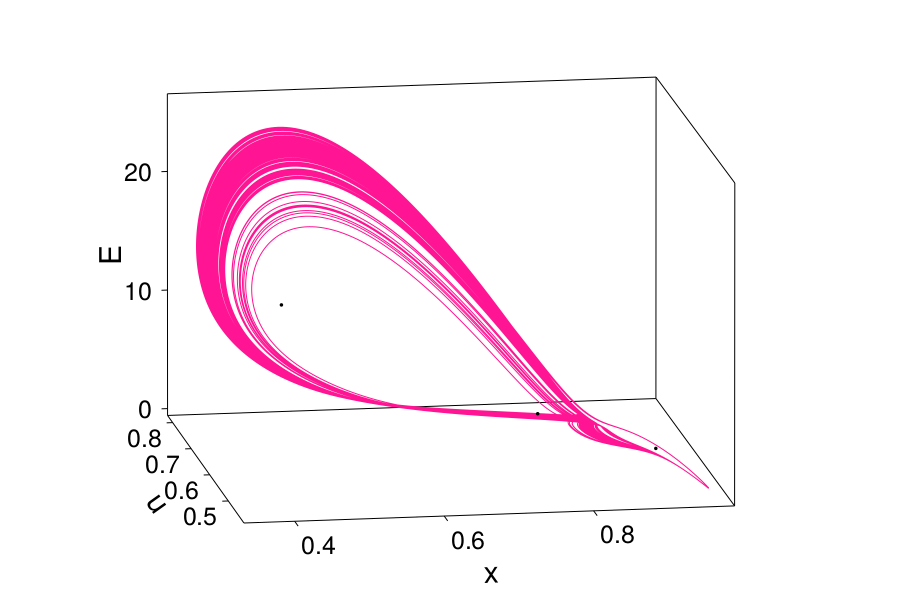

In [15]:
idx, idy, idz = 2, 3, 1
data = [ tr[:, idx], tr[:, idy], tr[:, idz] ]
plot_3d_fp(data, [fp, idx, idy, idz], 1, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "u", zl = "E", lw = 1.0, color = :deeppink);

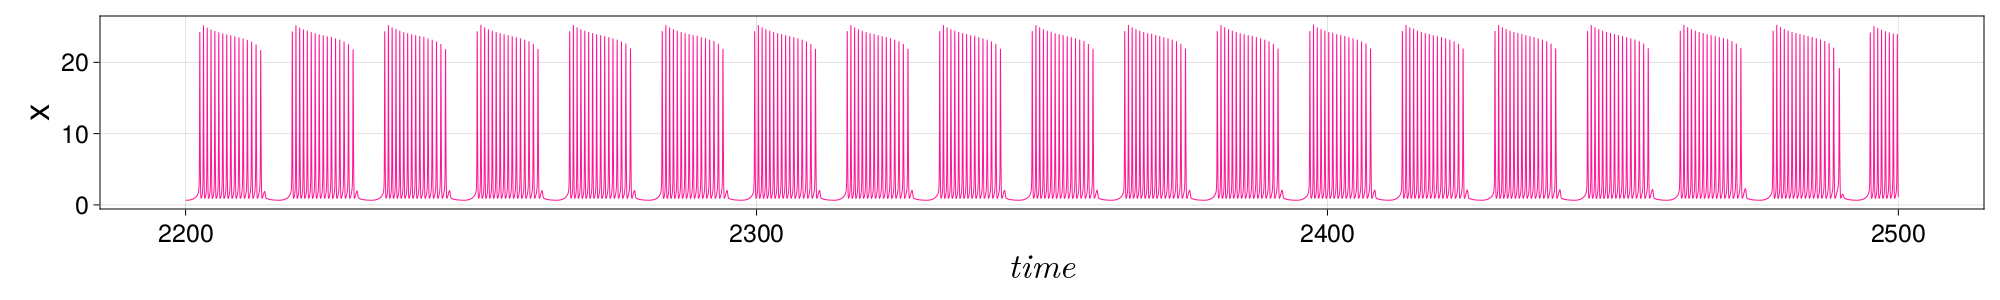

CairoMakie.Screen{IMAGE}


In [12]:
plot_timesereis(trange, tr[:, 1], 2200000, 2500000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)